<a href="https://www.kaggle.com/code/pavlostsoukias/exploring-four-years-of-superstore-sales-data?scriptVersionId=152174546" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## SuperStore EDA

In today's business landscape, data and analytics have become indispensable tools for optimizing performance. Across industries, leveraging data-driven insights is essential for achieving success and staying competitive in the modern business world.

For businesses of all sizes, this notebook delves into a 4-year global retail dataset. It explores country-level sales, customer behavior, product trends, sales variations by days and months, and the preferred shipping methods. Uncover valuable insights within each segment
![](https://images.pexels.com/photos/6483626/pexels-photo-6483626.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)


**Let's Start ;)**<br>
Let's import all the necessary libraries.

In [1]:
#importing all the nesseary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt
from ipywidgets import widgets, Layout
from IPython import display
plt.style.use("ggplot")

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the data
df = pd.read_csv("/kaggle/input/sales-forecasting/train.csv")

Now let's take a quick look at the data.

In [3]:
#Let's take a quick look at the data.
df.sample(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
3348,3349,CA-2018-154732,05/11/2018,07/11/2018,First Class,AH-10195,Alan Haines,Corporate,United States,Chicago,Illinois,60623.0,Central,OFF-BI-10000474,Office Supplies,Binders,Avery Recycled Flexi-View Covers for Binding S...,16.030
5922,5923,US-2016-126977,17/09/2016,23/09/2016,Standard Class,PF-19120,Peter Fuller,Consumer,United States,New York City,New York,10035.0,East,TEC-PH-10000169,Technology,Phones,ARKON Windshield Dashboard Air Vent Car Mount ...,67.800
2585,2586,CA-2016-121041,03/11/2016,10/11/2016,Standard Class,CS-12250,Chris Selesnick,Corporate,United States,Haltom City,Texas,76117.0,Central,OFF-EN-10001137,Office Supplies,Envelopes,"#10 Gummed Flap White Envelopes, 100/Box",6.608


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
# Let's examine some basic statistics.
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [6]:
# It seems that we have a few missing values in the postal code, and we also need to correct some data types.

df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [7]:
# Let's examine the locations where postal codes are missing, and we'll decide later on how to handle these missing values.
df[df["Postal Code"].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [8]:
# Let's correct the data types for the dates.
df["Order Date"] = pd.to_datetime(df["Order Date"],format="%d/%m/%Y")
df["Ship Date"] = pd.to_datetime(df["Ship Date"],format="%d/%m/%Y")

In [9]:
# No duplicates found.
df.duplicated().sum()

0

In [10]:
# Before we begin analyzing sales, let's take a look at the number of countries in the dataset."
df.Country.value_counts()

Country
United States    9800
Name: count, dtype: int64

In [11]:
#Since this dataset only contains information about sales in the United States,
#we will drop the 'Country' column and the 'Postal Code' column since we won't be using them in this analysis.
df.drop("Country",axis=1,inplace=True)
df.drop("Postal Code",inplace=True,axis=1)

## Country-Level Sales Analysis <br>
In this section, we will analyze sales at a country level.<br>
We will begin with the analysis by **region**, followed by **states**, and conclude with **cities**.

In this section, we aim to answer three key questions: <br>

* Which region generated the highest sales?<br>
* What are the top 10 most profitable states?<br>
* Which cities are the most profitable?"


In [12]:
# Let's find the top-performing state by grouping the data by "State," summing up the "Sales" column, and sorting it in descending order.
State_Sales = df.groupby("State")[["Sales"]].sum().sort_values(by="Sales", ascending=False).copy() 

# Next, let's find the top-performing region by grouping the data by "Region," summing up the "Sales" column, and sorting it in descending order.
Region_Sales = df.groupby("Region")[["Sales"]].sum().sort_values(by="Sales", ascending=False).copy()

# Now, let's calculate the total sales for each city by grouping the data by "City," summing up the "Sales" column, and sorting it in descending order.
City_Sales = df.groupby("City")[["Sales"]].sum().sort_values(by="Sales", ascending=False).copy()


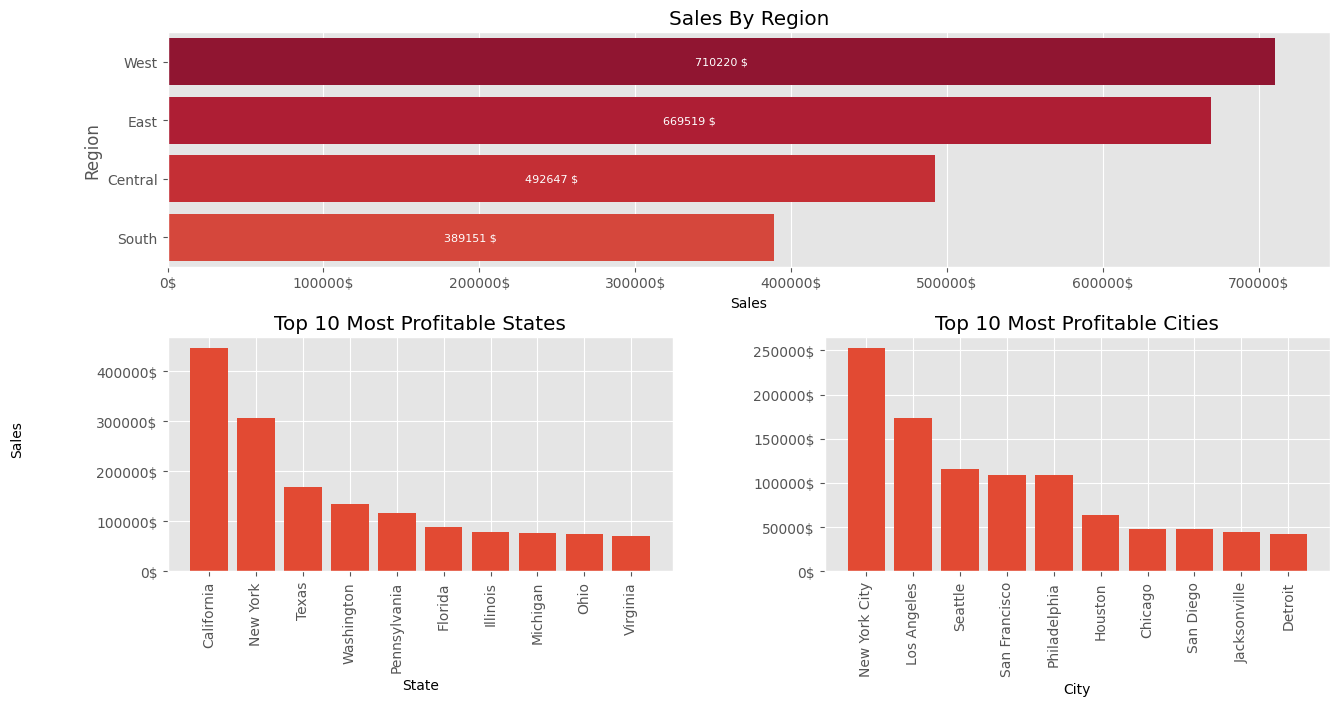

In [13]:
#Choosing and inverting a color pallete
color_list = [None] * 12 
inverted_palette = sns.color_palette("YlOrRd", len(color_list))[::-1]

# Creating a figure 
fig = plt.figure(figsize=(15, 7))

# Creating a grid layout for subplots with 2 rows and 2 columns, and set spacing
grid = plt.GridSpec(2, 2, wspace=0.3, hspace=0.3)

# Define three subplots within the grid
ax1 = plt.subplot(grid[0, :])  # The first subplot spans the entire top row
ax2 = plt.subplot(grid[1, 0])  # The second subplot is in the bottom-left position
ax3 = plt.subplot(grid[1, 1])  # The third subplot is in the bottom-right position


# Plotting the data for the first subplot (ax1)
sns.barplot(ax=ax1,y=Region_Sales.index, x=Region_Sales.Sales,palette=inverted_palette)
ax1.set_title("Sales By Region")
ax1.set_xlabel("Sales", color="black", fontsize=10)
ax1.xaxis.set_major_formatter('{x:.0f}$')
ax1.bar_label(ax1.containers[0], color='white', fontsize=8, label_type='center', labels=[f'{x:.0f} $' for x in ax1.containers[0].datavalues])


# Plotting the data for the second subplot (ax2)
state_labels = State_Sales.head(10).index
state_sales = State_Sales.head(10).Sales
ax2.bar(state_labels, state_sales)
ax2.set_xticks(range(len(state_labels)))
ax2.set_xticklabels(labels=state_labels, rotation=90, fontsize=10, ha="center")
ax2.set_title("Top 10 Most Profitable States")
ax2.set_xlabel("State", color="black", fontsize=10)
ax2.yaxis.set_major_formatter('{x:.0f}$')



# Plotting the data for the third subplot (ax3)
city_labels = City_Sales.head(10).index
city_sales = City_Sales.head(10).Sales
ax3.bar(city_labels, city_sales)
ax3.set_xticks(range(len(city_labels)))
ax3.set_xticklabels(labels=city_labels, rotation=90, fontsize=10, ha="center")
ax3.set_title("Top 10 Most Profitable Cities")
ax3.set_xlabel("City", color="black", fontsize=10)
ax3.yaxis.set_major_formatter('{x:.0f}$')



fig.text(0.02, 0.3, "Sales", va="center", rotation="vertical", fontsize=10)

plt.show()


Key points:

* The top-performing region is West.
* The most profitable state is California.
* The most profitable city is New York.

## Customer Level
<br>
In this section, we will analyze the data at a customer level.<br>

Questions for this section:

* Who are the top 10 customers based on order frequency?
* Who are the top 10 customers based on sales?
* Are there any customers common to both lists?
* How is the sales distribution among these two categories of customers?"

In [14]:
# Top 10 customers by orders (frequency)
Top_Orders =pd.DataFrame(pd.DataFrame(df[["Customer Name"]].value_counts()).sort_values("count",ascending=False).head(10))
Top_Orders.rename(columns={"count":"Total Orders"},inplace=True)
Top_Orders.reset_index(inplace=True)
Top_Orders.set_index("Customer Name",drop=True,inplace=True)

# Top 10 customers By Sales 
Top_Sales_Cus = df.groupby(["Customer ID","Customer Name","Region"])[["Sales"]].sum().sort_values("Sales",ascending=False).head(10)
Top_Sales_Cus.reset_index(inplace=True)
Top_Sales_Cus.set_index("Customer Name",drop=True,inplace=True)

**While searching for a way to display the two dataframes, I came across this solution on StackOverflow. Credit goes to the contributors in the forum!**
[StackOverflow](https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side)

In [15]:
#create output widgets
widget1 = widgets.Output()
widget2 = widgets.Output()

# render in output widgets
with widget1:
    display.display(Top_Orders.style.set_caption('Top 10 customers based on order frequency'))
    
with widget2:
    display.display(Top_Sales_Cus.style.set_caption('Top 10 customers based on sales'))
    


# add some CSS styles to distribute free space
box_layout = Layout(display='flex',
                    flex_flow='row',
                    justify_content='space-around',
                    width='auto'
                   )
    
# create Horisontal Box container
hbox = widgets.HBox([widget1, widget2], layout=box_layout)

# render hbox
hbox

In [16]:
# Merge the two dataframes based on a common column (e.g., customer ID)
merged_df = Top_Orders.merge(Top_Sales_Cus, on='Customer Name', how='inner')

# If merged_df is not empty, it means there are customers common to both lists
if not merged_df.empty:
    print("There are customers common to both lists.")
else:
    print("There are no common customers to both lists.")
    


There are no common customers to both lists.


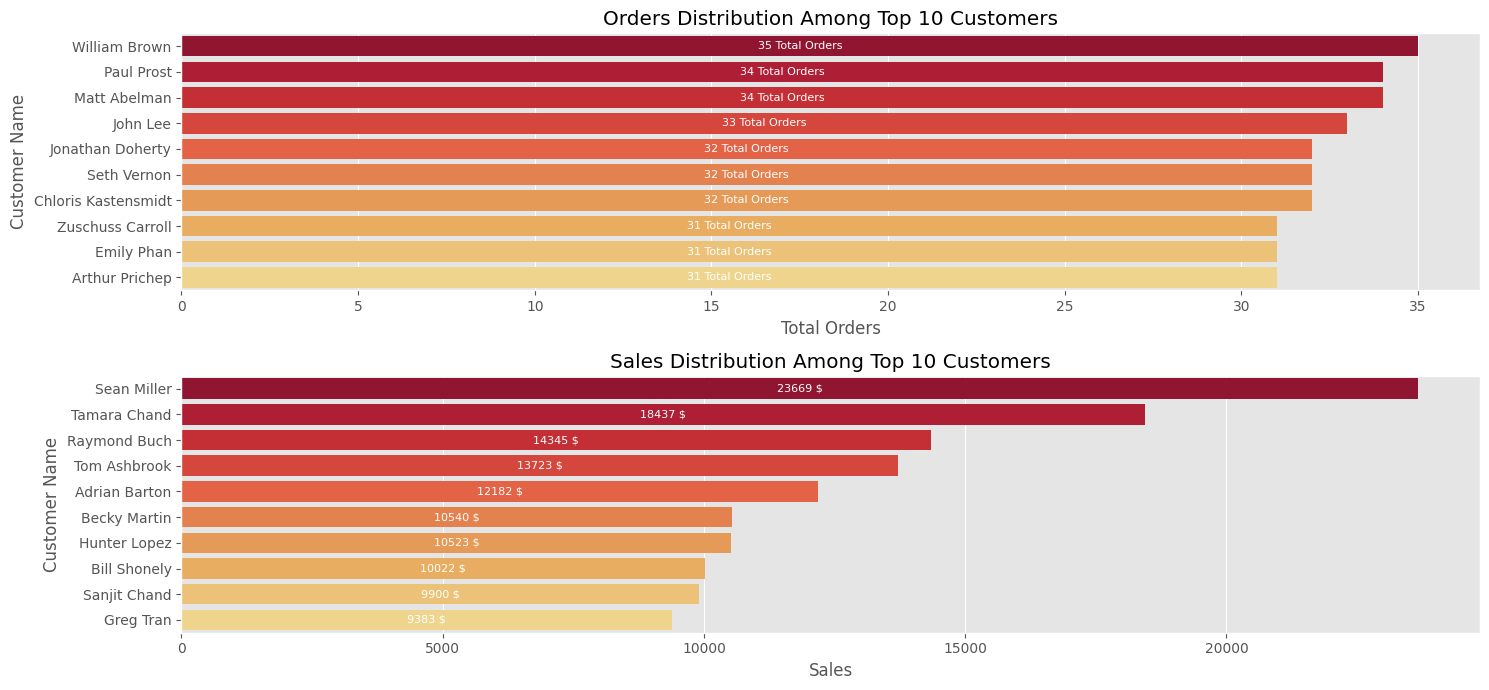

In [17]:
# Create a figure with two subplots
fig, ax = plt.subplots(2, 1, figsize=(15, 7))

# First subplot: Orders Distribution Among Top 10 Customers
sns.barplot(ax=ax[0], data=Top_Orders, x="Total Orders", y=Top_Orders.index, palette=inverted_palette)
# Add labels inside the bars with white font and center-aligned
ax[0].bar_label(ax[0].containers[0], color='white', fontsize=8, label_type='center', labels=[f'{x:.0f} Total Orders' for x in ax[0].containers[0].datavalues])
ax[0].set_title("Orders Distribution Among Top 10 Customers")  # Set subplot title

# Second subplot: Sales Distribution Among Top 10 Customers
sns.barplot(ax=ax[1], data=Top_Sales_Cus, x="Sales", y=Top_Sales_Cus.index, palette=inverted_palette)
# Add labels inside the bars with white font and center-aligned
ax[1].bar_label(ax[1].containers[0], color='white', fontsize=8, label_type='center', labels=[f'{x:.0f} $' for x in ax[1].containers[0].datavalues])
ax[1].set_title("Sales Distribution Among Top 10 Customers")  # Set subplot title

# Adjust the layout to prevent overlapping
fig.tight_layout()

# Display the plots
plt.show()

In [18]:
# Preparing the Data for Visualization
list_freq = Top_Orders.index
Top_Freq_Orders= df[df["Customer Name"].isin(list_freq)]
Sales_dis = pd.DataFrame(columns=["Sales"],index=["Total Sales Of Top 10 Customers","Sales Generated From Top 10 Frequent Customers","Total Sales"], data = [Top_Sales_Cus.Sales.sum(),Top_Freq_Orders.Sales.sum(),df.Sales.sum()])

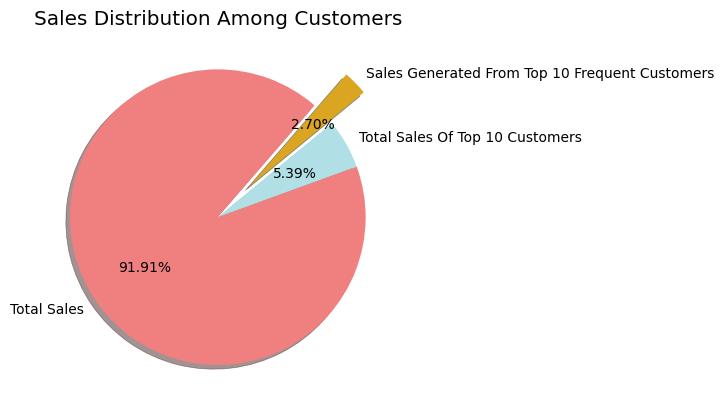

In [19]:
# Let's visualize the data through a pie chart
explode = (0, 0.3, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
Sales_dis["Sales"].plot(kind="pie",autopct='%1.2f%%',shadow=True, startangle=20\
                        ,explode=explode\
                        ,colors=["powderblue","goldenrod","lightcoral"]\
                        ,title="Sales Distribution Among Customers",\
                        ylabel="")
plt.show()


Key Points:

* The top customer based on order frequency is William Brown.
* The top customer based on sales is Sean Miller.
* There are no common customers in the two lists.
* When both lists are combined, they are responsible for less than 10% of the total sales.

## Product Level
<br>
In this section, our focus will be on the products.

Questions for this section:

* Which category generated the highest total sales over the four years?
* Which category was the top sales generator for each individual year?
* What are the top 15 performing products overall?
* Which product was the top performer in terms of sales for each year?"



In [20]:
# First, let's conduct some basic data engineering."
df["Order Date Year"] = df["Order Date"].dt.year
df["Order Date Month"] = df["Order Date"].dt.month
df["Order Date Day"] = df["Order Date"].dt.dayofweek


In [21]:
#"Let's begin with the first question."
Grouped_by_Cat = df.groupby(by=["Order Date Year","Category"])[["Sales"]].sum()
Grouped_by_Cat_All = df.groupby(by=["Category"])[["Sales"]].sum()

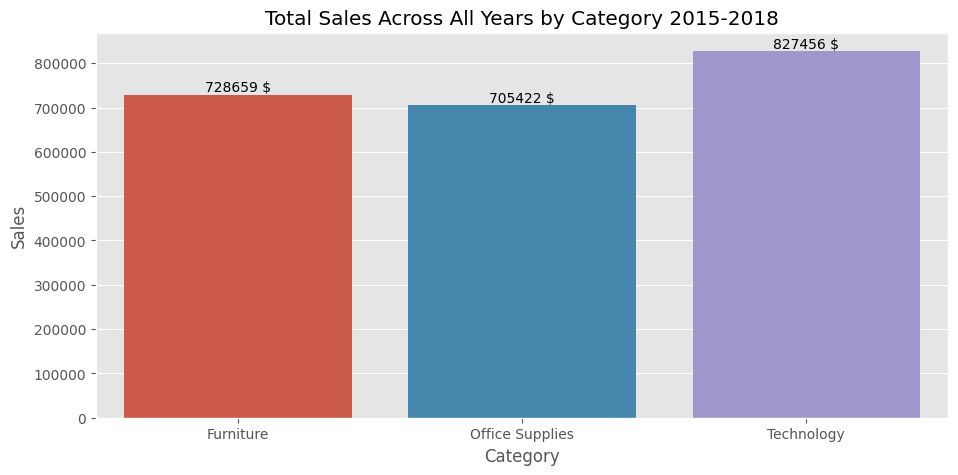

In [22]:
fig, ax = plt.subplots(1,1,figsize=(11,5))
plt.title("Total Sales Across All Years by Category 2015-2018")
sns.barplot(ax=ax,data=Grouped_by_Cat_All,x=Grouped_by_Cat_All.index,y="Sales")
ax.bar_label(ax.containers[0], color='black', fontsize=10, label_type='edge', labels=[f'{x:.0f} $' for x in ax.containers[0].datavalues])

plt.show()

In [23]:
# Now, let's prepare the data for the second question.
Category_Sales_2015 = Grouped_by_Cat.loc[2015]
Category_Sales_2016 = Grouped_by_Cat.loc[2016]
Category_Sales_2017 = Grouped_by_Cat.loc[2017]
Category_Sales_2018 = Grouped_by_Cat.loc[2018]

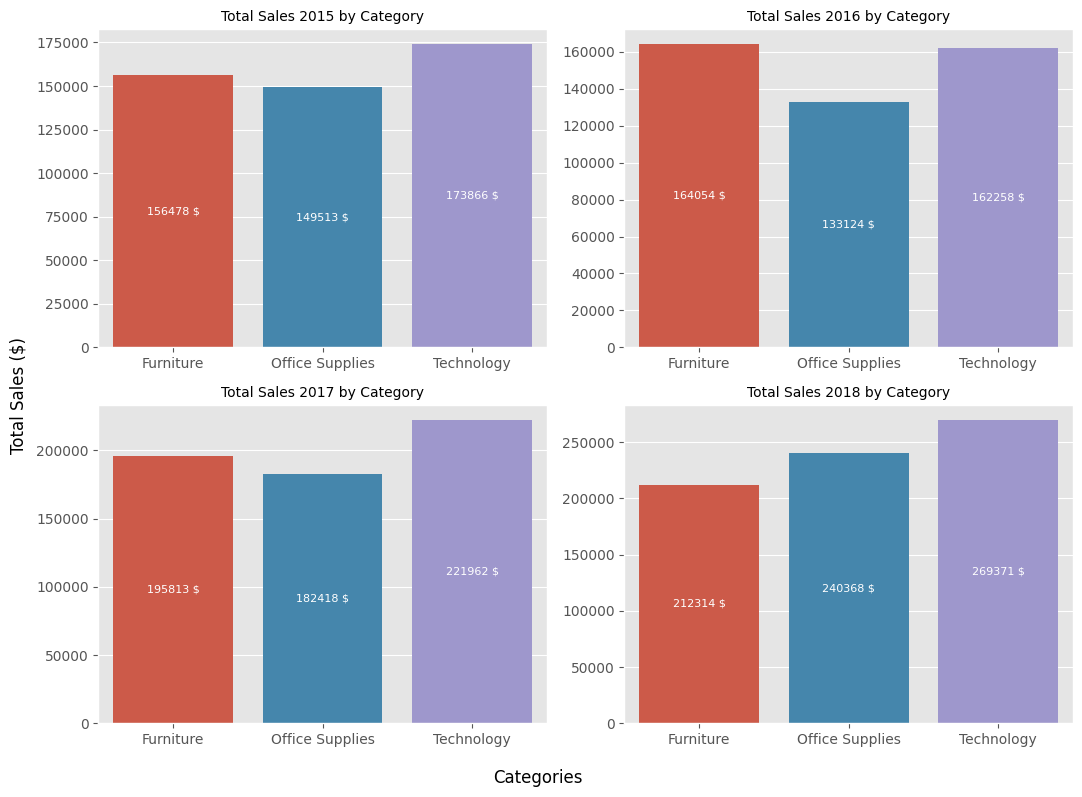

In [24]:
# Let's plot the answer
# Create a 2x2 grid of subplots with a specific figure size
fig, ax = plt.subplots(2, 2, figsize=(11, 8))

# Plot 1: Total Sales 2015 by Category
sns.barplot(ax=ax[0, 0], data=Category_Sales_2015, x=Category_Sales_2015.index, y="Sales")
ax[0, 0].bar_label(ax[0, 0].containers[0], color='white', fontsize=8, label_type='center', labels=[f'{x:.0f} $' for x in ax[0, 0].containers[0].datavalues])
ax[0, 0].set_title("Total Sales 2015 by Category", fontsize=10)

# Plot 2: Total Sales 2016 by Category
sns.barplot(ax=ax[0, 1], data=Category_Sales_2016, x=Category_Sales_2016.index, y="Sales")
ax[0, 1].bar_label(ax[0, 1].containers[0], color='white', fontsize=8, label_type='center', labels=[f'{x:.0f} $' for x in ax[0, 1].containers[0].datavalues])
ax[0, 1].set_title("Total Sales 2016 by Category", fontsize=10)

# Plot 3: Total Sales 2017 by Category
sns.barplot(ax=ax[1, 0], data=Category_Sales_2017, x=Category_Sales_2017.index, y="Sales")
ax[1, 0].bar_label(ax[1, 0].containers[0], color='white', fontsize=8, label_type='center', labels=[f'{x:.0f} $' for x in ax[1, 0].containers[0].datavalues])
ax[1, 0].set_title("Total Sales 2017 by Category", fontsize=10)

# Plot 4: Total Sales 2018 by Category
sns.barplot(ax=ax[1, 1], data=Category_Sales_2018, x=Category_Sales_2018.index, y="Sales")
ax[1, 1].bar_label(ax[1, 1].containers[0], color='white', fontsize=8, label_type='center', labels=[f'{x:.0f} $' for x in ax[1, 1].containers[0].datavalues])
ax[1, 1].set_title("Total Sales 2018 by Category", fontsize=10)

# Remove individual x-labels and y-labels from subplots
for row in ax:
    for subplot in row:
        subplot.set_xlabel('')
        subplot.set_ylabel('')

# Add common x-label and y-label to the entire figure
fig.supxlabel("Categories")
fig.supylabel("Total Sales ($)")

# Adjust subplot layout for better spacing
fig.tight_layout()

# Display the figure
plt.show()


In [25]:
# Now, let's prepare the data for the third question.
Grouped_by_Cat_All_pro = df.groupby(by=["Product Name"])[["Sales"]].sum()
Grouped_by_Cat_All_pro.sort_values("Sales",ascending=False,inplace=True)
Grouped_by_Cat_All_pro = Grouped_by_Cat_All_pro[:15]

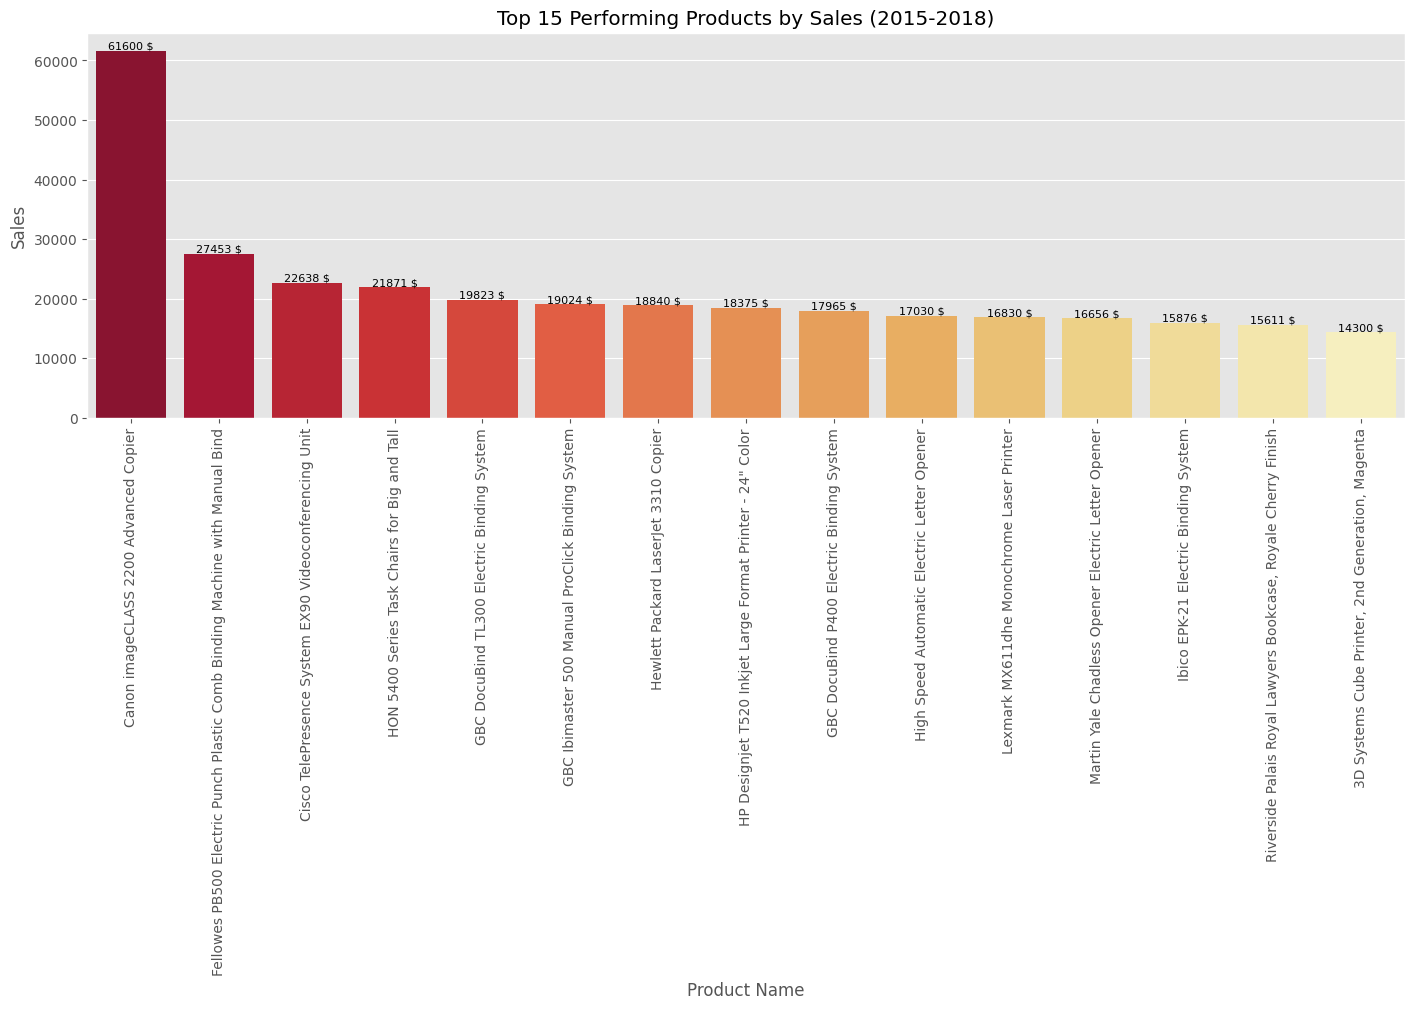

In [26]:
# Let's visualize the answer.
# Create a list of 15 None values
color_list = [None] * 15

# Create a color palette with reversed colors from the "YlOrRd" palette
inverted_palette_2 = sns.color_palette("YlOrRd", len(color_list))[::-1]

# Create a figure and axis for the bar plot
fig, ax = plt.subplots(1, 1, figsize=(17, 5))

# Set the title of the plot
plt.title("Top 15 Performing Products by Sales (2015-2018)")

# Create a bar plot with custom colors from the inverted palette
sns.barplot(ax=ax, data=Grouped_by_Cat_All_pro, x=Grouped_by_Cat_All_pro.index, y="Sales", palette=inverted_palette_2)

# Add labels to the bars with black color, fontsize, and edge labels
ax.bar_label(ax.containers[0], color='black', fontsize=8, label_type='edge', labels=[f'{x:.0f} $' for x in ax.containers[0].datavalues])

# Set x-axis tick labels with rotation, fontsize, and custom labels
ax.set_xticklabels(labels=Grouped_by_Cat_All_pro.index, rotation=90, fontsize=10)

# Display the plot
plt.show()


In [27]:
#Finally, let's address the fourth and final question for this section.
Grouped_by_pro = df.groupby(by=["Order Date Year","Product Name"])[["Sales"]].sum()
# Grouped_by_pro.sort_values(by=["Order Date Year","Sales"],ascending=[True,False])
Grouped_by_pro_2015 = Grouped_by_pro.loc[2015].sort_values("Sales",ascending=False)[:1]
Grouped_by_pro_2016 = Grouped_by_pro.loc[2016].sort_values("Sales",ascending=False)[:1]
Grouped_by_pro_2017 = Grouped_by_pro.loc[2017].sort_values("Sales",ascending=False)[:1]
Grouped_by_pro_2018 = Grouped_by_pro.loc[2018].sort_values("Sales",ascending=False)[:1]

Grouped_by_pro_2015["Year"] = 2015
Grouped_by_pro_2016["Year"] = 2016
Grouped_by_pro_2017["Year"] = 2017
Grouped_by_pro_2018["Year"] = 2018


concatenated_df = pd.concat([Grouped_by_pro_2015, Grouped_by_pro_2016, Grouped_by_pro_2017, Grouped_by_pro_2018], axis=0)


In [28]:
concatenated_df

,Sales,Year
Product Name,,
Cisco TelePresence System EX90 Videoconferencing Unit,22638.480,2015
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,15760.276,2016
Canon imageCLASS 2200 Advanced Copier,25899.926,2017
Canon imageCLASS 2200 Advanced Copier,35699.898,2018


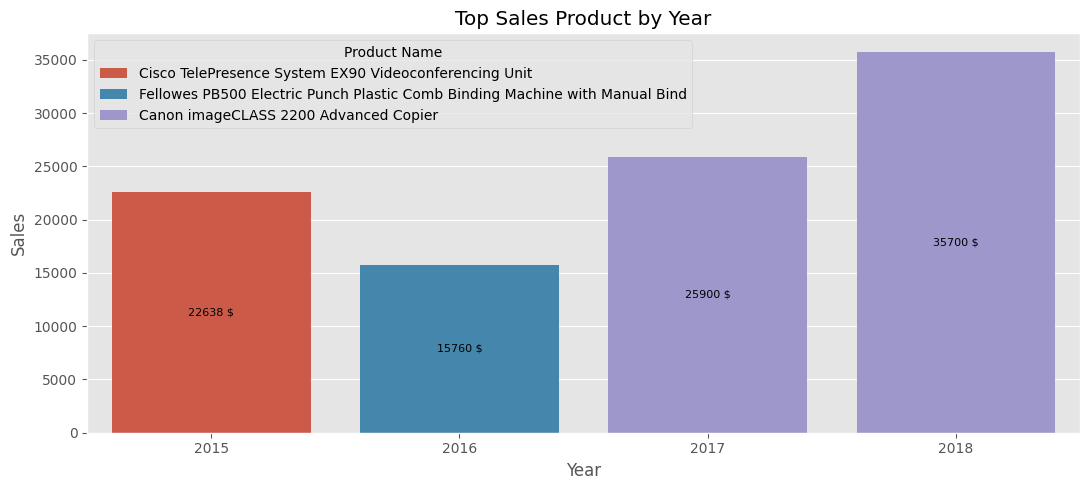

In [29]:
# Create a subplot with a specified figure size
fig, ax = plt.subplots(1, 1, figsize=(11, 5))

# Set the title for the plot
plt.title("Top Sales Product by Year")

# Create a bar plot with 'Year' on the x-axis, 'Sales' on the y-axis, and different colors for each product ('index') using the 'hue' parameter
sns.barplot(ax=ax, data=concatenated_df, x="Year", y="Sales", hue=concatenated_df.index, dodge=False)

# Add labels inside the bars with black font and center-aligned
for i, container in enumerate(ax.containers):
    try:
        ax.bar_label(container, color='black', fontsize=8, label_type='center', labels=[f'{x:.0f} $' for x in container.datavalues])
    except IndexError:
        pass  # Ignore the "list index out of range" error

# Ensure proper layout to prevent overlapping
fig.tight_layout()

# Display the plot
plt.show()

Key Takeaway Points:

* The best-performing category across all four years is Technology.
* The top-performing product is the Canon Image CLASS 2200 Advanced Copier.
* The highest sales year is 2018, while the top-growth year is 2017.

## Analyzing Sales Growth, Top-Performing Months, and Days of the Week Over the Years
<br>

Questions
* What is the trend in sales growth over the years?
* Which month of the year generates the highest number of orders?
* On which day of the week do we observe the highest orders volume?

In [30]:
# Create a DataFrame 'Day_Orders' to count and sort orders by day of the week
Day_Orders = pd.DataFrame(df[["Order Date Day"]].value_counts()).sort_index()

# Reset the index of 'Day_Orders' to make the day of the week a regular column
Day_Orders.reset_index(inplace=True)

# Replace numerical day codes (0-6) with corresponding day names
Day_Orders.replace([0, 1, 2, 3, 4, 5, 6], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], inplace=True)

# Rename the columns in 'Day_Orders' for clarity
Day_Orders.rename({"count": "Orders", "Order Date Day": "Day"}, inplace=True, axis=1)

# Create a DataFrame 'Month_Orders' to count and sort orders by month
Month_Orders = pd.DataFrame(df[["Order Date Month"]].value_counts()).sort_index()

# Reset the index of 'Month_Orders' to make the month a regular column
Month_Orders.reset_index(inplace=True)

# Replace numerical month codes (1-12) with corresponding month names
Month_Orders.replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], inplace=True)

# Rename the columns in 'Month_Orders' for clarity
Month_Orders.rename({"count": "Orders", "Order Date Month": "Month"}, inplace=True, axis=1)

# Calculate the yearly sales progression by grouping data by year and summing up sales
Yearly_Sales_Progression = df.groupby("Order Date Year")[["Sales"]].sum()


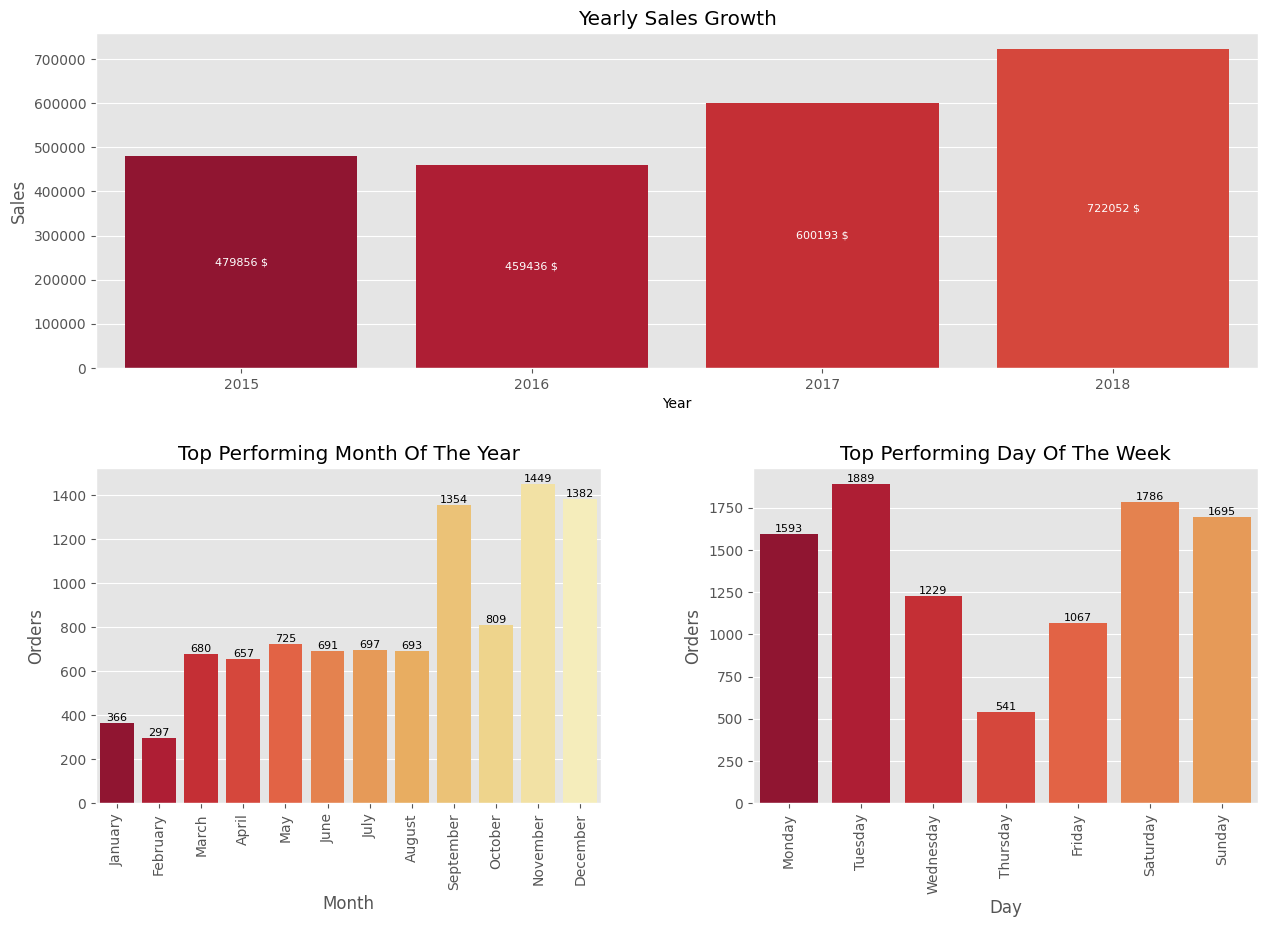

In [31]:
#Choosing and inverting a color pallete
color_list = [None] * 12 
inverted_palette = sns.color_palette("YlOrRd", len(color_list))[::-1]

# Creating a figure 
fig = plt.figure(figsize=(15, 10))

# Creating a grid layout for subplots with 2 rows and 2 columns, and set spacing
grid = plt.GridSpec(2, 2, wspace=0.3, hspace=0.3)

# Define three subplots within the grid
ax1 = plt.subplot(grid[0, :])  # The first subplot spans the entire top row
ax2 = plt.subplot(grid[1, 0])  # The second subplot is in the bottom-left position
ax3 = plt.subplot(grid[1, 1])  # The third subplot is in the bottom-right position


# Plotting the data for the first subplot (ax1)
sns.barplot(ax=ax1,y=Yearly_Sales_Progression.Sales, x=Yearly_Sales_Progression.index,palette=inverted_palette)
ax1.set_title("Yearly Sales Growth")
ax1.set_xlabel("Year", color="black", fontsize=10)
ax1.bar_label(ax1.containers[0], color='white', fontsize=8, label_type='center', labels=[f'{x:.0f} $' for x in ax1.containers[0].datavalues])


# Plotting the data for the second subplot (ax2)
ax2.set_title("Top Performing Month Of The Year")
sns.barplot(ax=ax2,data=Month_Orders,x="Month",y="Orders",palette=inverted_palette)
ax2.bar_label(ax2.containers[0], color='black', fontsize=8, label_type='edge', labels=[f'{x:.0f}' for x in ax2.containers[0].datavalues])
ax2.set_xticklabels(labels=Month_Orders["Month"], rotation=90, fontsize=10,)



# Plotting the data for the third subplot (ax3)
ax3.set_title("Top Performing Day Of The Week")
sns.barplot(ax=ax3,data=Day_Orders,x="Day",y="Orders",palette=inverted_palette)
ax3.bar_label(ax3.containers[0], color='black', fontsize=8, label_type='edge', labels=[f'{x:.0f}' for x in ax3.containers[0].datavalues])
ax3.set_xticklabels(labels=Day_Orders["Day"], rotation=90, fontsize=10,)




plt.show()


Key Takeaways:

* Overall, there is steady sales growth over the four years, with one exception in 2016.
* November consistently stands out as the top-performing month in terms of order volume.
* Tuesday emerges as the top-performing day in generating sales.

## Shipping Modes

Question
* Which shipping modes do customers prefer?

In [32]:
# "Let's prepare the data in order to answer this question."
ship_mode=df.groupby("Ship Mode")[["Sales"]].sum()

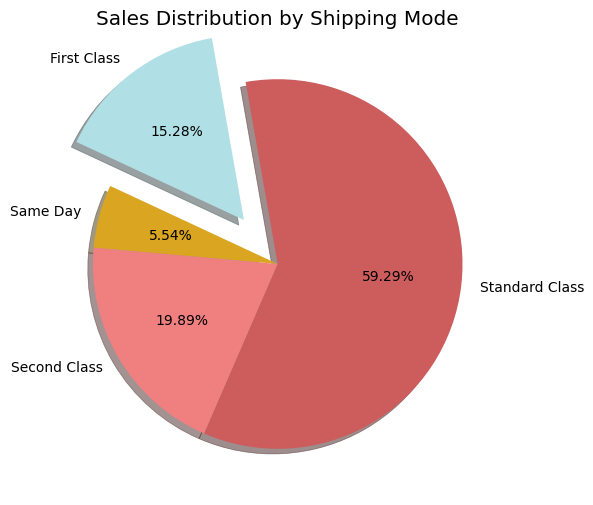

In [33]:
# Explode only the 2nd slice (i.e., 'Hogs')
explode = (0.3, 0.0, 0.0, 0.0)

# Create a larger figure
fig, ax = plt.subplots(figsize=(6, 6))

# Plot the pie chart without a y-label
ship_mode["Sales"].plot(
    kind="pie",
    autopct='%1.2f%%',
    shadow=True,
    startangle=100,
    explode=explode,
    colors=["powderblue", "goldenrod", "lightcoral", "indianred"],
    title="Sales Distribution by Shipping Mode",
    ylabel="",
    ax=ax  # Use the ax parameter to specify the subplot
)

plt.show()

It appears that the majority of customers prefer the standard shipping option

**If you find my notebook helpful, please consider giving it an upvote!**